## House Prices: Kaggle Competition

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import os
PATH = os.getcwd() + '/data/'
os.chdir(PATH)

In [3]:
data_train = pd.read_csv('train.csv')

In [4]:
data_test = pd.read_csv('test.csv')
data_test.shape

(1459, 80)

In [5]:
data_train_x = data_train.loc[:,data_train.columns != 'SalePrice']
data_train_y = data_train.loc[:,data_train.columns == 'SalePrice']

In [6]:
data_all = pd.concat([data_train_x,data_test])

In [7]:
data_all.shape

(2919, 80)

In [8]:
data_all.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
Exterior2nd         1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
                 ... 
YearBuilt           0
OverallCond         0
SaleCondition       0
Heating             0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [9]:
data_all.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu', 'LotFrontage','GarageFinish','GarageYrBlt',\
                         'GarageQual','GarageCond','GarageType'],axis=1,inplace=True)
data_all.drop(['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1'],axis=1,inplace=True)
data_all.shape

(2919, 64)

In [10]:
null_columns=data_all.columns[data_all.isnull().any()]

for col in null_columns:
    if data_all[col].dtype == 'O':
        data_all[col].fillna(value=data_all[col].mode(), inplace = True)
    else:
        data_all[col].fillna(value=data_all[col].median(), inplace = True)

In [11]:
data_all['Exterior1st'].fillna('VinylSd', inplace = True)
data_all['Exterior2nd'].fillna('VinylSd', inplace = True)
data_all['Electrical'].fillna('SBrkr', inplace = True)
data_all['KitchenQual'].fillna('TA', inplace = True)
data_all['SaleType'].fillna('WD', inplace = True)
data_all['Utilities'].fillna('AllPub', inplace = True)
data_all['Functional'].fillna('Typ', inplace = True)
data_all['MSZoning'].fillna('RL',inplace=True)
data_all['MasVnrType'].fillna('None',inplace=True)

In [12]:
data_all.isnull().sum().any()

False

In [13]:
print(data_train.shape)
print(data_test.shape)
print(data_all.shape)

(1460, 81)
(1459, 80)
(2919, 64)


In [14]:
train_x = data_all.iloc[0:1460]
test = data_all.iloc[1460:]

In [15]:
train = pd.concat([train_x,data_train_y],axis=1)

### Let's create new features

In [16]:
data_all.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2919,NaN,NaN,NaN,1460,842.787,1,730.5,1460,2189.5,2919
MSSubClass,2919,NaN,NaN,NaN,57.1377,42.5176,20,20,50,70,190
MSZoning,2919,5,RL,2269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,2919,NaN,NaN,NaN,10168.1,7887,1300,7478,9453,11570,215245
Street,2919,2,Pave,2907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,2919,4,Reg,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,2919,4,Lvl,2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2919,2,AllPub,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,2919,5,Inside,2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandSlope,2919,3,Gtl,2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data_all['YearRemodAdd'] = data_all['YearRemodAdd'] - data_all['YearBuilt']

# drop - BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
# drop 1stFlrSF, 2ndFlrSF
# drop BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom, GarageCars, 
data_all['Total_area'] = data_all['1stFlrSF'] + data_all['2ndFlrSF']
data_all['Total_baths'] = data_all['BsmtFullBath'] + data_all['BsmtHalfBath']

#drop YrSold
data_all['Age_before_sold'] = data_all['YrSold'] - data_all['YearBuilt']
data_all['YearBuilt'] = 2019 - data_all['YearBuilt']

data_all.drop(['BsmtFinSF1','BsmtFinSF2','1stFlrSF', '2ndFlrSF','BsmtFullBath',\
               'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'GarageCars','YrSold'],axis=1,inplace=True)

print(data_all.shape)
data_all.head()

(2919, 56)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,Total_area,Total_baths,Age_before_sold
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,WD,Normal,1710,1.0,5
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,WD,Normal,1262,1.0,31
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,WD,Normal,1786,1.0,7
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,WD,Abnorml,1717,1.0,91
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,WD,Normal,2198,1.0,8


In [18]:
import seaborn as sns

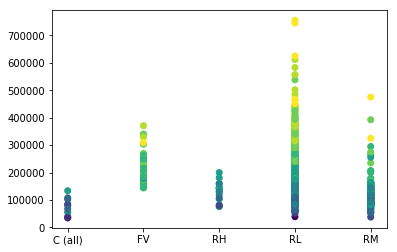

In [19]:
plt.scatter(x=train['MSZoning'], y=train['SalePrice'], c=train['OverallQual'])

In [20]:
train_x = data_all.iloc[0:1460]
train = pd.concat([train_x,data_train_y],axis=1)
test = data_all.iloc[1460:]
print(train_x.shape)
print(data_train_y.shape)
print(train.shape)

(1460, 56)
(1460, 1)
(1460, 57)


In [21]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'Total_area', 'Total_baths',
       'Age_before_sold', 'SalePrice'],
      dtype='object')

In [22]:
corr = train.corr()

corr_y = corr.loc['SalePrice']

corr_y[abs(corr_y) >= 0.3].index

Index(['OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'Total_area', 'Age_before_sold', 'SalePrice'],
      dtype='object')

#### Explore categorical columns too

In [23]:
all_col =data_all.columns

for col in all_col:
    if data_all[col].dtype == 'O':
        data_all[col] = data_all[col].astype('category')
        
data_all['MSSubClass'] = data_all['MSSubClass'].astype('category')
data_all['MoSold'] = data_all['MoSold'].astype('category')

In [24]:
# Drop numberical columns with Correlation < 0.5
#train.drop(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea',\
#       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',\
#       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',\
#       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',\
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',\
#       'MoSold', 'YrSold'],axis=1,inplace=True)

#print('1: ',train.shape)

In [25]:
# Drop categorical columns who do not look relevent for prediction
## train.drop(['Neighborhood','Exterior1st','Exterior2nd','LotShape','LandSlope','BldgType','HouseStyle','RoofStyle'],axis=1,inplace=True)
## train.drop(['RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','Heating','Electrical','KitchenQual','Functional'],axis=1,inplace=True)

In [26]:
#train.shape

In [27]:
#test.drop(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea',\
#       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',\
#       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',\
#       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',\
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',\
#       'MoSold', 'YrSold'],axis=1,inplace=True)

#print('1: ',test.shape)

In [28]:
#test.drop(['Neighborhood','Exterior1st', 'Exterior2nd','LotShape', 'LandSlope', 'BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','Heating','Electrical','KitchenQual','Functional'],axis=1,inplace=True)

In [29]:
#test.shape

In [30]:
#data_all.drop(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea',\
#       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',\
#       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',\
#       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',\
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',\
#       'MoSold', 'YrSold'],axis=1,inplace=True)
#data_all.drop(['Neighborhood','Exterior1st','Exterior2nd','LotShape','LandSlope','BldgType','HouseStyle','RoofStyle'],axis=1,inplace=True)
#data_all.drop(['RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','Heating','Electrical','KitchenQual','Functional'],axis=1,inplace=True)
#data_all.shape

In [31]:
cat_cols = data_all.select_dtypes(include=['category']).columns

In [32]:
data_all = pd.get_dummies(columns=cat_cols, data=data_all,prefix=cat_cols, prefix_sep="_",drop_first=True)

In [33]:
data_all.shape

(2919, 213)

In [34]:
#data_all.columns

In [35]:
train_x = data_all.iloc[0:1460]
train = pd.concat([train_x,data_train_y],axis=1)
test = data_all.iloc[1460:]

In [36]:
#data_all.select_dtypes(include=['float64']).columns
data_all.dtypes.unique(), data_train_y.dtypes

(array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object),
 SalePrice    int64
 dtype: object)

In [37]:
train['SalePrice'] = train['SalePrice'].astype('uint8')

cat_cols2 = train.select_dtypes(include=['uint8']).columns

cat_filter = train[cat_cols2]

In [38]:
corr_2 = cat_filter.corr()
corr_2

corr_2y = corr_2.loc['SalePrice']

corr_2y[abs(corr_2y) <= 0.05].index

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [39]:
corr_2y[abs(corr_2y) >= 0.05].index

Index(['LandContour_HLS', 'Neighborhood_NPkVill', 'Neighborhood_Veenker',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng',
       'Heating_Wall', 'SalePrice'],
      dtype='object')

In [40]:
remove_col = np.array(corr_2y[abs(corr_2y) <= 0.05].index)

In [41]:
data_all.drop(remove_col,axis=1,inplace=True)

In [42]:
train_x = data_all.iloc[0:1460]
train = pd.concat([train_x,data_train_y],axis=1)
test = data_all.iloc[1460:]
print(train.shape)
print(test.shape)

(1460, 34)
(1459, 33)


In [43]:
data_all.columns

Index(['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Total_area', 'Total_baths', 'Age_before_sold', 'MSSubClass_150',
       'LandContour_HLS', 'Neighborhood_NPkVill', 'Neighborhood_Veenker',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng',
       'Heating_Wall'],
      dtype='object')

In [44]:
#data_all['MSSubClass'] = data_all['MSSubClass'].astype('category')
#data_all['MoSold'] = data_all['MoSold'].astype('category')

#cat_cols = data_all.select_dtypes(include=['category']).columns

#data_all = pd.get_dummies(columns=cat_cols, data=data_all,prefix=cat_cols, prefix_sep="_",drop_first=True)

#train_x = data_all.iloc[0:1460]
#train = pd.concat([train_x,data_train_y],axis=1)
#test = data_all.iloc[1460:]

In [45]:
#train.columns

In [46]:
#cat_filter = train[['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',\
#                    'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',\
#                    'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_150',\
#                    'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MoSold_2',\
#                    'MoSold_3', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8',\
#                    'MoSold_9', 'MoSold_10', 'MoSold_11', 'MoSold_12','SalePrice']]

#corr_2 = cat_filter.corr()
#corr_2

#corr_2y = corr_2.loc['SalePrice']

#corr_2y[abs(corr_2y) <= 0.1].index

In [47]:
#data_all.drop(['MSSubClass_40', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75',
#       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_120', 'MSSubClass_180',
#       'MSSubClass_190', 'MoSold_2', 'MoSold_3', 'MoSold_4', 'MoSold_5',
#       'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',
#       'MoSold_11', 'MoSold_12'],axis=1,inplace=True)

In [48]:
#corr_2y[abs(corr_2y) >= 0.1].index

In [49]:
train['SalePrice'] = train['SalePrice'].astype('int64')

int_cols = train.select_dtypes(include=['int64']).columns
int_filter = train[int_cols]

In [50]:
corr_2 = int_filter.corr()
corr_2

corr_2y = corr_2.loc['SalePrice']

corr_2y[abs(corr_2y) <= 0.2].index

Index(['Id', 'OverallCond', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [51]:
corr_2y[abs(corr_2y) >= 0.2].index

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'Total_area',
       'Age_before_sold', 'SalePrice'],
      dtype='object')

In [52]:
remove_col = ['OverallCond', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [53]:
data_all.drop(remove_col,axis=1,inplace=True)

In [54]:
train_x = data_all.iloc[0:1460]
train = pd.concat([train_x,data_train_y],axis=1)
test = data_all.iloc[1460:]
print(train.shape)
print(test.shape)

(1460, 26)
(1459, 25)


In [55]:
train['SalePrice'] = train['SalePrice'].astype('float64')

float_cols = train.select_dtypes(include=['float64']).columns

In [56]:
float_filter = train[float_cols]

In [57]:
float_cols.shape

(6,)

In [58]:
corr_2 = float_filter.corr()
corr_2

corr_2y = corr_2.loc['SalePrice']

corr_2y[abs(corr_2y) <= 0.2].index

Index([], dtype='object')

In [59]:
corr_2y[abs(corr_2y) >= 0.2].index

Index(['MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'Total_baths',
       'SalePrice'],
      dtype='object')

In [60]:
remove_col = np.array(corr_2y[abs(corr_2y) <= 0.2].index)

In [61]:
data_all.drop(remove_col,axis=1,inplace=True)

In [62]:
train_x = data_all.iloc[0:1460]
train = pd.concat([train_x,data_train_y],axis=1)
test = data_all.iloc[1460:]
print(train.shape)
print(test.shape)

(1460, 26)
(1459, 25)


In [63]:
train.shape

(1460, 26)

In [64]:
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [65]:
data_all = pd.concat([train.loc[:,train.columns != 'SalePrice'],test])

In [66]:
print(data_all.shape)
data_all.columns

(2919, 24)


Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Total_area', 'Total_baths',
       'Age_before_sold', 'MSSubClass_150', 'LandContour_HLS',
       'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng', 'Heating_Wall'],
      dtype='object')

In [67]:
data_all.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,...,Total_baths,Age_before_sold,MSSubClass_150,LandContour_HLS,Neighborhood_NPkVill,Neighborhood_Veenker,Exterior2nd_Brk Cmn,Exterior2nd_HdBoard,Exterior2nd_Wd Shng,Heating_Wall
0,8450,7,16,0,196.0,150.0,856.0,1710,8,0,...,1.0,5,0,0,0,0,0,0,0,0
1,9600,6,43,0,0.0,284.0,1262.0,1262,6,1,...,1.0,31,0,0,0,1,0,0,0,0
2,11250,7,18,1,162.0,434.0,920.0,1786,6,1,...,1.0,7,0,0,0,0,0,0,0,0
3,9550,7,104,55,0.0,540.0,756.0,1717,7,1,...,1.0,91,0,0,0,0,0,0,1,0
4,14260,8,19,0,350.0,490.0,1145.0,2198,9,1,...,1.0,8,0,0,0,0,0,0,0,0


In [68]:
#train['YearRemodAdd'] = 2019 + train['YearRemodAdd']
#test['YearRemodAdd'] = 2019 + test['YearRemodAdd']
#train.head()

In [69]:
#data_all['YearRemodAdd'] = 2019 + data_all['YearRemodAdd']

In [70]:
#remove two outliers
train.loc[train['GrLivArea'] > 4500].index

train.drop(train.loc[train['GrLivArea'] > 4500].index, inplace=True)

train.reset_index(drop=True, inplace=True)

In [71]:
scalar_train = StandardScaler(copy=False)

In [72]:
#scalar_test = StandardScaler(copy=False)

In [73]:
test.shape
#scalar.fit(data_all)

(1459, 24)

In [74]:
data_all.values.shape

(2919, 24)

In [75]:
train_x = train.loc[:,train.columns != 'SalePrice']
#test = data_all.iloc[1458:]
train_y = train['SalePrice']

In [76]:
train_cols = pd.concat([train_x,train_y],axis=1).columns
train_cols

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Total_area', 'Total_baths',
       'Age_before_sold', 'MSSubClass_150', 'LandContour_HLS',
       'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng', 'Heating_Wall',
       'SalePrice'],
      dtype='object')

In [77]:
num_col = ['LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtUnfSF','TotalBsmtSF','GrLivArea','TotRmsAbvGrd',\
           'GarageArea','WoodDeckSF','OpenPorchSF','Total_area','Total_baths','Age_before_sold']
other_col = ['MSSubClass_150', 'LandContour_HLS','Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn',\
             'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng', 'Heating_Wall','SalePrice']

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
LotArea                 1458 non-null int64
OverallQual             1458 non-null int64
YearBuilt               1458 non-null int64
YearRemodAdd            1458 non-null int64
MasVnrArea              1458 non-null float64
BsmtUnfSF               1458 non-null float64
TotalBsmtSF             1458 non-null float64
GrLivArea               1458 non-null int64
TotRmsAbvGrd            1458 non-null int64
Fireplaces              1458 non-null int64
GarageArea              1458 non-null float64
WoodDeckSF              1458 non-null int64
OpenPorchSF             1458 non-null int64
Total_area              1458 non-null int64
Total_baths             1458 non-null float64
Age_before_sold         1458 non-null int64
MSSubClass_150          1458 non-null uint8
LandContour_HLS         1458 non-null uint8
Neighborhood_NPkVill    1458 non-null uint8
Neighborhood_Veenker    1458 non-null uint8
Ext

In [79]:
train_x1 = pd.DataFrame(data = scalar_train.fit_transform(train[num_col].values), columns=num_col)
train_x2 = train[other_col]
train = pd.concat([train_x1,train_x2], axis=1)
#scalar_train.fit_transform(train_x.values,train_y.values)
#cols = data_all.columns
#data_all_new = pd.DataFrame(data=scalar.fit_transform(data_all.values),columns=all_cols)

In [80]:
train.shape

(1458, 24)

In [81]:
train.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Total_area', 'Total_baths',
       'Age_before_sold', 'MSSubClass_150', 'LandContour_HLS',
       'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng', 'Heating_Wall',
       'SalePrice'],
      dtype='object')

In [82]:
print(train.shape)
train.head()

(1458, 24)


,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,...,Age_before_sold,MSSubClass_150,LandContour_HLS,Neighborhood_NPkVill,Neighborhood_Veenker,Exterior2nd_Brk Cmn,Exterior2nd_HdBoard,Exterior2nd_Wd Shng,Heating_Wall,SalePrice
0,-0.203934,0.658506,-1.052959,-0.556205,0.523937,-0.943795,-0.473766,0.393013,0.921812,0.357973,...,-1.045249,0,0,0,0,0,0,0,0,208500
1,-0.087252,-0.068293,-0.158428,-0.556205,-0.570739,-0.640584,0.504925,-0.489391,-0.316329,-0.056795,...,-0.185182,0,0,0,1,0,0,0,0,181500
2,0.080162,0.658506,-0.986698,-0.515355,0.334044,-0.301168,-0.319490,0.542706,-0.316329,0.640770,...,-0.979090,0,0,0,0,0,0,0,0,223500
3,-0.092325,0.658506,1.862551,1.690524,-0.570739,-0.061314,-0.714823,0.406800,0.302742,0.801022,...,1.799589,0,0,0,0,0,0,1,0,140000
4,0.385566,1.385305,-0.953567,-0.556205,1.384039,-0.174452,0.222888,1.354202,1.540882,1.715398,...,-0.946011,0,0,0,0,0,0,0,0,250000


In [83]:
test_x1 = pd.DataFrame(data = scalar_train.fit_transform(test[num_col].values), columns=num_col)
test_x2 = test[['MSSubClass_150', 'LandContour_HLS','Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn',\
                'Exterior2nd_HdBoard', 'Exterior2nd_Wd Shng', 'Heating_Wall']]
test = pd.concat([test_x1,test_x2], axis=1)
test.head()
#test = pd.DataFrame(data = scalar_test.fit_transform(test.values), columns=test.columns)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageArea,...,Total_baths,Age_before_sold,MSSubClass_150,LandContour_HLS,Neighborhood_NPkVill,Neighborhood_Veenker,Exterior2nd_Brk Cmn,Exterior2nd_HdBoard,Exterior2nd_Wd Shng,Heating_Wall
0,0.363929,-0.751101,0.340945,-0.520737,-0.563316,-0.650473,-0.370719,-1.215588,-0.918335,1.185921,...,-0.903746,0.413784,0,0,0,0,0,0,0,0
1,0.897861,-0.054877,0.439695,-0.520737,0.047057,-0.339237,0.639228,-0.323539,-0.255371,-0.741235,...,-0.903746,0.512398,0,0,0,0,0,0,0,0
2,0.809646,-0.751101,-0.844059,-0.478418,-0.563316,-0.954844,-0.266787,0.294508,-0.255371,0.042537,...,-0.903746,-0.769577,0,0,0,0,0,0,0,0
3,0.032064,-0.054877,-0.876976,-0.520737,-0.450284,-0.526894,-0.271306,0.243004,0.407593,-0.012788,...,-0.903746,-0.802448,0,0,0,0,0,0,0,0
4,-0.971808,1.337571,-0.679475,-0.520737,-0.563316,1.059039,0.528518,-0.424487,-0.918335,0.153187,...,-0.903746,-0.605221,0,1,0,0,0,1,0,0


In [84]:
print(train.shape)
print(test.shape)

(1458, 24)
(1459, 23)


#### should drop x+y data together (below step seems to be wrong)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(train.loc[:,train.columns != 'SalePrice'], train['SalePrice'], test_size=0.33, random_state=42)

In [86]:
linr = LinearRegression().fit(x_train, y_train)

In [87]:
linr.score(x_train, y_train)

0.8463036067611394

In [88]:
rcv = RidgeCV(alphas=[0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.0,3,6,10.0], cv=5).fit(x_train, y_train)

In [89]:
rcv.alpha_

10.0

In [90]:
rcv.score(x_train,y_train)

0.8453127570400729

In [91]:
yt_pred = rcv.predict(x_test)
yt_pred_lm = linr.predict(x_test)

In [92]:
print(sqrt(mean_squared_error(y_test, yt_pred)))
print(sqrt(mean_squared_error(y_test, yt_pred_lm)))

30035.109941400773
30328.596394783308


In [93]:
y_pred = linr.predict(test)

In [94]:
y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("linear_regression2.csv", index=False,sep=',',encoding='utf-8')

In [95]:
enetcv = ElasticNetCV(l1_ratio=1, eps=0.0001, n_alphas=1000, cv=5).fit(x_train, y_train)
enetcv.score(x_train,y_train)

0.8458826952872542

In [96]:
from sklearn.svm import SVR

In [97]:
sv = SVR(kernel='poly',degree=5, C=0.1).fit(x_train, y_train)
sv.score(x_train,y_train)

-0.03776521504086494

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [99]:
DTR = DecisionTreeRegressor(max_depth=9,random_state=42, max_leaf_nodes=60).fit(x_train,y_train)
DTR.score(x_train, y_train)

0.9286266874287489

In [100]:
yt_dt = DTR.predict(x_test)
print(sqrt(mean_squared_error(y_test, yt_dt)))

35245.67605706973


In [101]:
from sklearn.ensemble import RandomForestRegressor

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [102]:
RF = RandomForestRegressor().fit(x_train,y_train)
RF.score(x_train, y_train)

0.9712172516711459

In [103]:
yt_rf = RF.predict(x_test)
print(sqrt(mean_squared_error(y_test, yt_rf)))
print("R2 Score: ", r2_score(y_test, yt_rf))

27378.092417805226
R2 Score:  0.8758207416098939


In [104]:
y_pred = RF.predict(test)
y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("random_forest.csv", index=False,sep=',',encoding='utf-8')

In [105]:
RF.fit(train.loc[:,train.columns != 'SalePrice'], train['SalePrice'])
print("Train Score :", RF.score(train.loc[:,train.columns != 'SalePrice'], train['SalePrice']))

y_pred = RF.predict(test)

y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("RF_all.csv", index=False,sep=',',encoding='utf-8')

Train Score : 0.9752345207614072


In [106]:
from sklearn.neural_network import MLPRegressor

In [107]:
mlp = MLPRegressor(activation='relu', alpha=0.025,batch_size=128, hidden_layer_sizes=(18,8), learning_rate_init=0.0001, max_iter=80,\
                   momentum=0.9, random_state=42, solver='lbfgs')

mlp.fit(x_train,y_train)
mlp.score(x_train,y_train)

0.9296394236077752

In [108]:
yt_mlp = mlp.predict(x_test)
print(sqrt(mean_squared_error(y_test, yt_mlp)))
print("R2 Score: ", r2_score(y_test, yt_mlp))

23473.350078064246
R2 Score:  0.9087163823606472


In [109]:
y_pred = mlp.predict(test)

y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("mlp.csv", index=False,sep=',',encoding='utf-8')

In [110]:
mlp.fit(train.loc[:,train.columns != 'SalePrice'], train['SalePrice'])
print("Train Score :", mlp.score(train.loc[:,train.columns != 'SalePrice'], train['SalePrice']))

y_pred = mlp.predict(test)

y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("mlp_all.csv", index=False,sep=',',encoding='utf-8')

Train Score : 0.9293143197868464


In [111]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
gbr = GradientBoostingRegressor(loss='ls', learning_rate=0.025,n_estimators=300,criterion='friedman_mse',max_depth=4,\
                               random_state=42,max_features=18,alpha=0.9,max_leaf_nodes=25)

gbr.fit(x_train,y_train)
print("Train Score :", gbr.score(x_train,y_train))

yt_gbr = gbr.predict(x_test)
print("Test RMSE", sqrt(mean_squared_error(y_test, yt_gbr)))
print("R2 Score: ", r2_score(y_test, yt_gbr))

Train Score : 0.9855219728639117
Test RMSE 23388.584746907778
R2 Score:  0.9093744661156673


In [113]:
y_pred = gbr.predict(test)

y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("gbr.csv", index=False,sep=',',encoding='utf-8')

In [114]:
gbr.fit(train.loc[:,train.columns != 'SalePrice'], train['SalePrice'])
print("Train Score :", gbr.score(train.loc[:,train.columns != 'SalePrice'], train['SalePrice']))

y_pred = gbr.predict(test)

y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("gbr_all.csv", index=False,sep=',',encoding='utf-8')

Train Score : 0.9784388532485732


In [115]:
from sklearn.ensemble import AdaBoostRegressor

In [116]:
abr = AdaBoostRegressor(n_estimators=300, learning_rate=1, loss='square', random_state=42)

abr.fit(x_train,y_train)
print("Train Score :", abr.score(x_train,y_train))

yt_abr = abr.predict(x_test)
print("Test RMSE", sqrt(mean_squared_error(y_test, yt_abr)))
print("R2 Score: ", r2_score(y_test, yt_abr))

Train Score : 0.8756920521817877
Test RMSE 31028.691077612693
R2 Score:  0.8404967257127395


In [117]:
from sklearn.ensemble import ExtraTreesRegressor

In [118]:
etr = ExtraTreesRegressor(n_estimators=200, criterion='mse', max_depth=15, min_samples_split=5, min_samples_leaf=1,\
                          min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,\
                          min_impurity_split=None, bootstrap=False, oob_score=False, random_state=42)

etr.fit(x_train,y_train)
print("Train Score :", etr.score(x_train,y_train))

yt_etr = etr.predict(x_test)
print("Test RMSE", sqrt(mean_squared_error(y_test, yt_etr)))
print("R2 Score: ", r2_score(y_test, yt_etr))

Train Score : 0.993785821232834
Test RMSE 23918.046900865687
R2 Score:  0.9052249291297035


In [119]:
y_pred = etr.predict(test)

y_df = pd.DataFrame(data = y_pred,columns=['SalePrice'])
subm = pd.concat([data_test['Id'],y_df], axis=1)
#subm.to_csv("etr.csv", index=False,sep=',',encoding='utf-8')

# Next Steps

* ### Do Stacking (mix of models)
* ### Build best model on whole data set and then run on test data set
* ### Use K-Fold
* ### Draw histogram of errors (low variance)